In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random


In [2]:
pd.options.display.max_rows = 200
df = pd.read_csv("Online Retail.csv")
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


- Ranging of ages.

,Range of age,Age
0,20-29,209
1,50-59,193
2,40-49,191
3,30-39,176
4,60-69,174
5,10-19,57


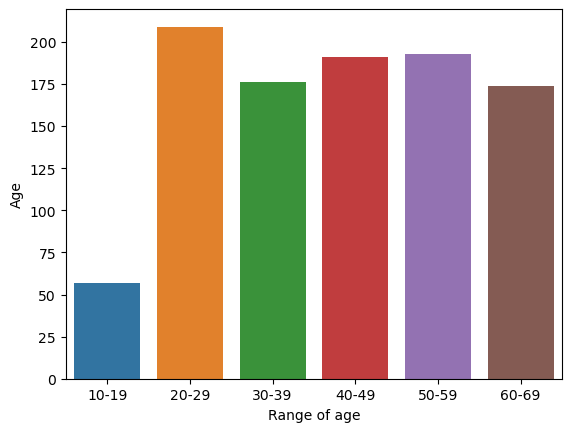

In [4]:
def RangingAge():
    bins = [10, 20, 30, 40, 50, 60, 70]
    labels = ["10-19", "20-29", "30-39","40-49","50-59", "60-69"]
    res = pd.cut(df.Age, bins, labels = labels, include_lowest=-True )
    res = res.value_counts()
    res = pd.DataFrame(res).reset_index()
    res = res.rename(columns={"index": "Range of age"})
    sns.barplot(data= res, x ="Range of age", y ="Age")
    return res
RangingAge()

-----------

- Knowing most gender that we want to target it.

In [7]:
def Gender():
    res = df.Gender.value_counts()
    res = res.plot(kind="bar")
    return res

- From above visualize we focus on our next marketing stratigies on female and trying improve our targeting strategies on other genders.

------------

# Most customer that spent money and we will lose them.
- High rate churn rate meaning business in risk of lossing customer, this may cause of customers are ot satisfied with the products or services. may be you are not marketing to the right people. Or perhaps you’re not taking into consideration your customers’ feedback..etc., so:

In [8]:
def Churn():
    res = len(df[df.Target_Churn == False]) / len(df)
    res = (res) * 100
    return res
Churn()

47.4

- So number of churn is very big and to aviod dispersion with this number we will fillter customers according to most customer spend money in the same period. 

In [9]:
def MostSpend():
    res = df[df.Total_Spend >= df.Total_Spend.mean()]
    res = res[res.Target_Churn == True]
    return res
MostSpend()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
13,14,42,Female,38.04,5524.28,12,4,259.81,5,4,2,212,False,Ignored,True
14,15,42,Female,176.08,6855.03,17,64,222.85,6,0,1,125,False,Ignored,True
16,17,19,Male,98.36,6747.13,10,9,414.80,7,3,2,274,True,Responded,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,978,48,Female,112.98,9872.14,13,67,390.77,8,1,4,50,True,Unsubscribed,True
979,980,52,Other,159.22,9562.24,6,64,327.74,4,2,3,78,False,Unsubscribed,True
982,983,25,Female,71.03,9444.26,16,34,291.91,9,0,2,333,False,Responded,True
988,989,55,Male,70.34,6316.38,5,48,202.66,5,4,1,92,True,Responded,True


- Customer that consider most spenders and major customers and we will churn them.

In [10]:
def MostYears_as_Customer():
    res = df.Years_as_Customer.mean()
    res = df[df.Years_as_Customer >= res]
    res = res[res.Target_Churn == True]
    return res
MostYears_as_Customer()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
13,14,42,Female,38.04,5524.28,12,4,259.81,5,4,2,212,False,Ignored,True
14,15,42,Female,176.08,6855.03,17,64,222.85,6,0,1,125,False,Ignored,True
16,17,19,Male,98.36,6747.13,10,9,414.80,7,3,2,274,True,Responded,True
19,20,41,Other,188.82,5844.46,11,88,378.05,8,4,5,57,True,Unsubscribed,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,983,25,Female,71.03,9444.26,16,34,291.91,9,0,2,333,False,Responded,True
985,986,55,Other,123.02,4479.92,14,45,364.16,4,3,3,76,True,Unsubscribed,True
986,987,22,Female,181.08,4991.52,17,57,160.70,5,0,4,317,False,Unsubscribed,True
994,995,23,Other,106.64,117.20,10,74,250.92,7,4,3,16,True,Ignored,True


- From the above result, if we compare to the last result “MostSpend”, we will find that 256 of the 263 customers we lost were distinguished as “the most spenders” and “one of the main customers.”
- So, we will studing above customers now to aviod lossing them, then see other customers.

- Most customers they returns items.

In [11]:
def return_items():
    res = df.Num_of_Returns.mean()
    res = df[df.Num_of_Returns > res]
    res = res[(res.Target_Churn == True)]
    return res
return_items()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
8,9,39,Other,24.46,4935.49,1,21,173.80,9,2,4,126,True,Responded,True
13,14,42,Female,38.04,5524.28,12,4,259.81,5,4,2,212,False,Ignored,True
14,15,42,Female,176.08,6855.03,17,64,222.85,6,0,1,125,False,Ignored,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,987,22,Female,181.08,4991.52,17,57,160.70,5,0,4,317,False,Unsubscribed,True
988,989,55,Male,70.34,6316.38,5,48,202.66,5,4,1,92,True,Responded,True
994,995,23,Other,106.64,117.20,10,74,250.92,7,4,3,16,True,Ignored,True
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True


- The best way to know if customer happy with your product is they come back to buy more, So:

- Factories that make cutomers come back
- Categories people that come to buy between (Kids, young ..etc).